In [1]:
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os,sys,time
import numpy as np
import pandas as pd
import pymaster as nmt
import healpy as hp
import healpy.newvisufunc as hpn
import astropy.io.fits as fits
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from   IPython.display import clear_output
from matplotlib import cm
from matplotlib import rc
from copy import deepcopy as dcopy
rc('text', usetex=True)
font = {'weight' : 'bold','size'   : 22}
matplotlib.rc('font', **font)

import astropy.units as u
import random
#############################################
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation/beam_analyzes/scripts')
#import beam_modelling         as model
import handling_data as hdata

In [2]:
path        = "/media/BINGODATA1/ComponentSeparation/MAPS/WN"
output_info = {'field':'WN', 
               "frequency":{"min":960,"max":1260,'nbands':30},
               "coverage":'partial',
               'beam': {'model':None, 'fwhm':0}, 
               'stokes':None,
               "freq_unit":"MHz", "stokes_unit":"mk", "fwhm_unit":"arcmin",
               'nside':256,
               "realization":1,
               "output_dir":'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/WN256_paper',
               "clear_output_dir":True,
               "apply_mask":True,
               "pathmask":'/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256'}

sigma_info = {'nside' :output_info['nside'],
              'nu_min':output_info['frequency']['min'],
              'nu_max':output_info['frequency']['max'],
              'nch'   :output_info['frequency']['nbands'],
              'nbeams':28,
              'Tsys'  :70,
              'Osur'  :5324,
              'Obeam' :0.35,
              'tsur'  :1,
              'K'     :2**(1/2),
              'fsky'  :0.13,
              'dcycle':1}#0.9}

ginfo = {'NSIDE':output_info['nside'],
         'frequency':{'min':   output_info['frequency']['min'],
                      'max':   output_info['frequency']['max'],
                      'nbands':output_info['frequency']['nbands']}}#,
        # 'realization':output_info['realization'][1]}

In [14]:
gnoise

{'nside': 256,
 'nu_min': 960000000.0,
 'nu_max': 1260000000.0,
 'nch': 30,
 'nbeams': 28,
 'Tsys': 70,
 'Osur': 5324,
 'Obeam': 0.35,
 'tsur': 31536000,
 'K': 1.4142135623730951,
 'fsky': 0.13,
 'dcycle': 1,
 'bandwidth': 10000000.0,
 'tpix': 58048.98572501878,
 'Snoise': 0.00012993187927585852,
 'Spix': 1.3980917251880065e-06,
 'sigmaN': 1.3980917251880065}

In [ ]:
1/(16.12*3600)

In [3]:
dir_mask   = "/media/BINGODATA1/ComponentSeparation/MAPS/HS"
name_mask  = "hitmap_140Horns_1Month.fits"
hitmap     = hdata.getmap(dirpath_=dir_mask, filename_=name_mask, healpix_readingformat=False, hdu=0)

gnoise = hdata.get_noise_level(sigma_info)

tpix: 16.12 hour/pix 

sigmaN: 129.93 mK 

sigma pix: 1.40 mK/pix 



In [5]:
hdata.save_FITS_newformat_wn(output_info, ginfo, gnoise['sigmaN'],hitmap)

Realization 0001
Filename: WN_None_256_960mhz1260mhz_30bins_partial_L0001.fits
Saving in /media/BINGODATA1/ComponentSeparation/building_dataset/dataset/WN256_paper/WN_None_256_960mhz1260mhz_30bins_partial_L0001.fits,,,
Saved.



In [15]:

dir_mask   = "/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/WN256_paper"
name_mask  = "WN_None_256_960mhz1260mhz_30bins_partial_L0001.fits"
wn     = hdata.getmap(dirpath_=dir_mask, filename_=name_mask, healpix_readingformat=False, hdu=1)[0]
wn

array([0., 0., 0., ..., 0., 0., 0.])

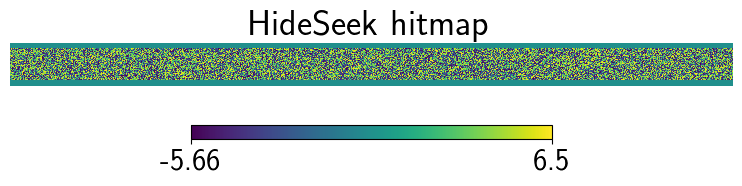

In [16]:
CMAP = 'viridis'
dec_min = -25.48
dec_max = -10.17
Dec_min = dec_min - 3
Dec_max = dec_max + 3
#hp.cartview(hitnorm256, norm="hist",  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=211)
hp.cartview(wn   , norm="hist",  title='HideSeek hitmap',latra=[Dec_min,Dec_max], cmap=CMAP)

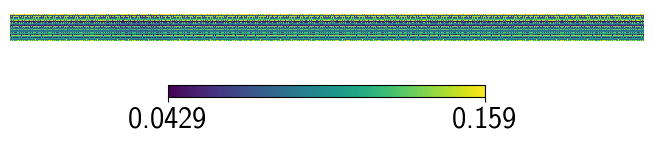

In [12]:
dir_mask   = "/media/BINGODATA1/ComponentSeparation/MAPS/HS"
name_mask  = "hitmap_140Horns_1Month.fits"
hitmap     = hdata.getmap(dirpath_=dir_mask, filename_=name_mask, healpix_readingformat=False, hdu=0)
hitnorm    = hitmap/hitmap.max()
hitnorm256 = hp.ud_grade(hitnorm,256)

kappa = hitnorm256*(sigma_info['tsur']/sigma_info['tpix'])
kappa = 1/kappa
hp.cartview(np.sqrt(kappa), norm="hist",  latra=[Dec_min,Dec_max], cmap=CMAP, title=None,sub=111)

In [23]:
net        = gnoise['Spix']*1e6*np.sqrt(gnoise['tpix'])
hitnorm    = hitmap/hitmap.max()
hitnorm256 = hp.ud_grade(hitnorm,gnoise['nside'])


var_per_pix = net**2/(1/hitnorm256*gnoise['tsur'])
var_per_pix[np.isinf(var_per_pix)]=0
m = np.random.normal(scale = np.sqrt(var_per_pix), size=len(var_per_pix))
#m[hitnorm256==0] = hp.UNSEEN

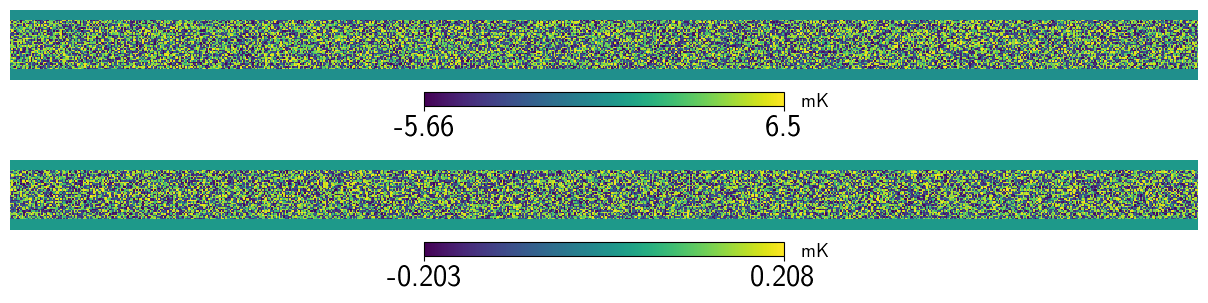

In [25]:
Dec_min = dec_min - 3
Dec_max = dec_max + 3
plt.figure(figsize=(12,3))
hp.cartview(wn*mask, norm="hist",  unit='mK',latra=[Dec_min,Dec_max], title=None,sub=211)
hp.cartview(m*mask,  norm="hist",  unit='mK',latra=[Dec_min,Dec_max], title=None,sub=212)

In [26]:
sys.path.insert(1, '/media/BINGODATA1/ComponentSeparation//beam_analyzes/scripts')
import handling_data          as hdata
dirM   = '/media/BINGODATA1/ComponentSeparation/building_dataset/dataset/M256'
pathM  = 'mask_256_apodcutless.fits'
mask   = hdata.getmap(dirpath_ = dirM,filename_= pathM, 
                      healpix_readingformat=False, hdu=1)
np.std(wn*mask),np.std(m*mask)

(0.4966064388672175, 0.01531220742103991)